In [1]:
from nltk.corpus import stopwords
import re
import pandas as pd
df = pd.read_csv('paradigms.csv')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

In [2]:
df.drop_duplicates(inplace=True)

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
STOPWORDS = set(stopwords.words('english'))

In [5]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_â€™œ]')

In [6]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df['Paradigms'] = df['Paradigms'].apply(clean_text)

In [7]:
print(df['Paradigms'].apply(lambda x: len(x.split(' '))).sum())

83110


In [8]:
from sklearn.model_selection import train_test_split
X = df.Paradigms
y = df.JudgingType
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((326,), (141,), (326,), (141,))

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.6666666666666666


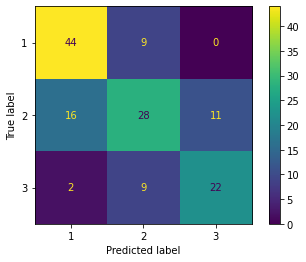

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naivebayes, X_test, y_test)  
plt.show()

In [19]:
import joblib
with open('final_model.joblib', 'wb') as f:
    joblib.dump(naivebayes,f)